# Linear Regression Notebook


## Introduction
In this notebook, we will explore the concept of linear regression, a fundamental technique in machine learning and statistics for predictive analysis.
Linear regression models the relationship between two variables by fitting a linear equation to observed data.



## What is Linear Regression?
Linear regression is used to predict a continuous target variable based on one or more input variables.
It attempts to establish a linear relationship between the input variables (independent variables) and the output variable (dependent variable).

### Formula for Linear Regression
For simple linear regression with one independent variable, the model is defined as:

$$ y = \beta_0 + \beta_1x + \epsilon $$

- \( y \) is the dependent variable (target).
- \( x \) is the independent variable (feature).
- \( $\beta_0 $\) is the y-intercept of the line.
- \( $\beta_1 $\) is the slope of the line.
- \( $\epsilon $\) is the error term (residual).

For multiple linear regression with more than one independent variable, the model is defined as:

$$ y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon $$

where \( n \) is the number of independent variables.



## Evaluation Metrics for Linear Regression
To evaluate the performance of a linear regression model, we use several metrics:

1. **Mean Squared Error (MSE):**
   $$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$
   Measures the average squared difference between actual and predicted values.

2. **Root Mean Squared Error (RMSE):**
   $$ RMSE = \sqrt{MSE} $$
   The square root of MSE, giving error in the same units as the target variable.

3. **R-squared (R²):**
   $$ R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2} $$
   Represents the proportion of variance in the target variable explained by the model. Ranges from 0 to 1, with higher values indicating better fit.


In [1]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



## Load Dataset
Let's load a dataset for demonstration purposes. We'll use a sample dataset, but you can replace this with any dataset you'd like to explore.


In [3]:

# Example using seaborn's tips dataset for demonstration
data=sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



## Simple Linear Regression
We will perform simple linear regression using one feature (e.g., 'total_bill') to predict 'tip'.


In [14]:
# Select features and target for simple linear regression
X=data[['total_bill']]
y=data['tip']

### Splitting Data into Training and Testing Sets
In machine learning, splitting data into training and testing sets is a crucial step to ensure that the model's performance is evaluated effectively. Typically, this split is performed using the train_test_split function from the **sklearn.model_selection** module.

#### Purpose:
- Training Set: The training set is the portion of the dataset used to train the model. The model learns patterns and relationships in this data to make predictions.
- Testing Set: The testing set is used to evaluate the model's performance after training. This data has not been seen by the model during training, making it ideal for checking how well the model generalizes to unseen data.
#### Why Split the Data?
- Avoid Overfitting: If the model is only evaluated on the data it was trained on, it may perform well on that data but fail to generalize to new data. This is known as overfitting.
- Performance Evaluation: By reserving a portion of the data for testing, we can accurately assess the model's performance on new data. This helps us understand the model's predictive accuracy and its ability to generalize.

In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=0)

#### Parameters:
- test_size: Represents the proportion of the dataset to include in the test split. For example, test_size=0.2 means 20% of the data will be used for testing, and 80% for training.
- random_state: Ensures that the split is reproducible. Setting a random_state means that every time you run the code, you will get the same split of data.

In [22]:
# Initialize and train the model
model=LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred=model.predict(X_test)

In [24]:
y_pred

array([2.7321953 , 2.79999268, 2.91621676, 1.73073111, 2.60434881,
       1.58545101, 2.76415692, 3.28813383, 2.7864332 , 4.38451435,
       3.47699796, 3.47021823, 2.39127132, 2.28763818, 2.32831661,
       3.97288739, 1.83726986, 2.38449158, 2.84745085, 3.26585755,
       3.93995723, 3.05471713, 2.57819839, 2.48521912, 2.33703342,
       2.61693975, 2.20628132, 3.91477534, 3.4779665 , 2.55592211,
       2.45519457, 2.23727441, 2.52202341, 2.05422148, 2.79999268,
       2.32541101, 2.66827205, 2.02903959, 5.7094689 , 2.57626132,
       1.85954614, 2.23243174, 2.54817383, 3.91961801, 2.26439336,
       2.67214619, 2.79515001, 3.11864037, 2.68183153])

In [26]:
y_test

64     2.64
63     3.76
55     3.51
111    1.00
225    2.50
92     1.00
76     3.08
181    5.65
188    3.50
180    3.68
73     5.00
107    4.29
150    2.50
198    2.00
224    1.58
44     5.60
145    1.50
110    3.00
243    3.00
189    4.00
210    2.00
104    4.08
138    2.00
8      1.96
199    2.00
203    2.50
220    2.20
125    4.20
5      4.71
22     2.23
74     2.20
124    2.52
12     1.57
168    1.61
45     3.00
158    2.61
37     3.07
136    2.00
212    9.00
223    3.00
222    1.92
118    1.80
231    3.00
155    5.14
209    2.23
18     3.50
108    3.76
15     3.92
71     3.00
Name: tip, dtype: float64

In [28]:
import numpy as np
# Evaluate the model
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred)
# Output evaluation metrics

print("Mean squared error", mse)
print("Root mean squared error", rmse)
print("R square", r2)

Mean squared error 0.821309064276629
Root mean squared error 0.9062610353957787
R square 0.5906895098589039



## Visualizing Simple Linear Regression
Below is a simple representation of linear regression, where a best-fit line is drawn through the data points:

![Simple Linear Regression](https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg)

We will also visualize the simple linear regression model we created earlier by plotting the actual versus predicted values.


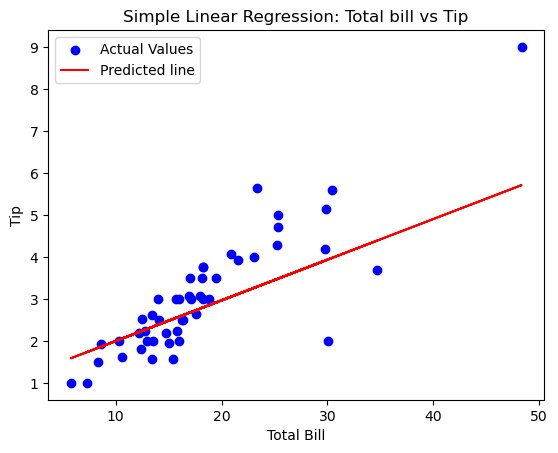

In [38]:
# Plot actual vs predicted values
plt.scatter(X_test, y_test, color='blue', label="Actual Values")
plt.plot(X_test, y_pred, color='red', label="Predicted line")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Simple Linear Regression: Total bill vs Tip")
plt.legend()
plt.show()

In [42]:
# Example unknown input
# Bill amount of $47
new_bill=[[47]]

# Make a prediction using the model
predicted_tip=model.predict(new_bill)

# Output the prediction
print(f"The predicted tip: ${predicted_tip[0]:.2f}")


The predicted tip: $5.58


C:\Users\cason\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Multiple Linear Regression

In [44]:
df=sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [46]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [50]:
# Features (X) and Target Variable (y)
X=df[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y=df['tip']

# Checking missing values

X.isnull().sum()

total_bill    0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### pd.get_dummies()
pd.get_dummies() is a function in the pandas library that converts categorical variables into a format that can be provided to machine learning algorithms to improve predictions. Specifically, it transforms categorical columns into multiple binary (0 or 1) columns, a process called one-hot encoding.

#### How It Works:
- Identifies all unique categories in the categorical variables.
- Creates a new column for each unique category. For instance, if a column named day has the categories ['Mon', 'Tue', 'Wed'], pd.get_dummies() will create three new columns: day_Mon, day_Tue, and day_Wed.
Assigns binary values (0 or 1) or (True/ False) to these new columns. For each row, it assigns 1 if the category applies and 0 if it does not.
#### Usage of drop_first=True:
To avoid multicollinearity (when two or more variables are highly correlated), you can set drop_first=True. This will drop the first category in each categorical variable and only include the remaining categories as dummy variables. By doing this, we reduce redundancy and prevent issues in regression models.

Example:
For a column day with categories [Mon, Tue, Wed]:

- pd.get_dummies(day) will create three columns: day_Mon, day_Tue, day_Wed.
- pd.get_dummies(day, drop_first=True) will create two columns: day_Tue, day_Wed. (If both are 0, it indicates day_Mon.)

In [54]:
# unique
X['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [56]:
X['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [58]:
X['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [60]:
X['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [66]:

# Use pd.get_dummies to one-hot encode all categorical variables
X_encoded=pd.get_dummies(X, columns=['sex', 'smoker', 'day', 'time'], drop_first=True)

# Display the first few rows of the encoded features to understand the structure
X_encoded.head()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,2,True,True,False,False,True,True
1,10.34,3,False,True,False,False,True,True
2,21.01,3,False,True,False,False,True,True
3,23.68,2,False,True,False,False,True,True
4,24.59,4,True,True,False,False,True,True


- Female: True/1, Male: False/0
- smoker_no: True/1, smoker_yes: False/0
- day_Fri: 100, day_Sat: 010, day_Sun: 001, day_thu: 000
- time_dinner: 1. time_lunch: 0

In [89]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test=train_test_split(X_encoded, y, test_size=.20, random_state=1)

# Initialize and train the model

mlr_model=LinearRegression()
mlr_model.fit(X_train.values, y_train.values)
# Make predictions on the test set

y_pred_mlr=mlr_model.predict(X_test.values)


In [91]:
import numpy as np
# Evaluate the model
mse=mean_squared_error(y_test, y_pred_mlr)
rmse=np.sqrt(mse)
r2=r2_score(y_test, y_pred_mlr)
# Output evaluation metrics
print("Multiple Linear Regression Evaluation Metrics:")
print(f"Mean squared error, {mse:.2f}")
print(f"Root mean squared error, {rmse:.2f}")
print(f"R square, {r2:.2f}")

# Output evaluation metrics




Multiple Linear Regression Evaluation Metrics:
Mean squared error, 1.35
Root mean squared error, 1.16
R square, 0.49


#### Example input: total_bill=60, size=2, sex_male=1, smoker_yes=0, day_Fri=1, day_Sat=0, day_Sun=0, time_Dinner=1 

In [93]:
X_encoded.sample()

,total_bill,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
151,13.13,2,False,True,False,False,True,True


In [99]:
mlr_model.predict([[60, 2, 0, 1, 1,0,0, 1]])

array([6.11859349])

### Total bill $80, party size 5, smoker, visited on thursday during lunch, group of females

In [102]:
mlr_model.predict([[80, 5, 1, 0, 0,0,0, 0]])

array([8.39698201])

In [104]:
mlr_model.predict([[80, 5, 1, 0, 0,0,1, 0]])

array([8.78386662])